What is your favourite hobby : skiing
Where are you from : kosovo
If you were an animal what animal would you be : eagle


<IPython.core.display.Javascript object>


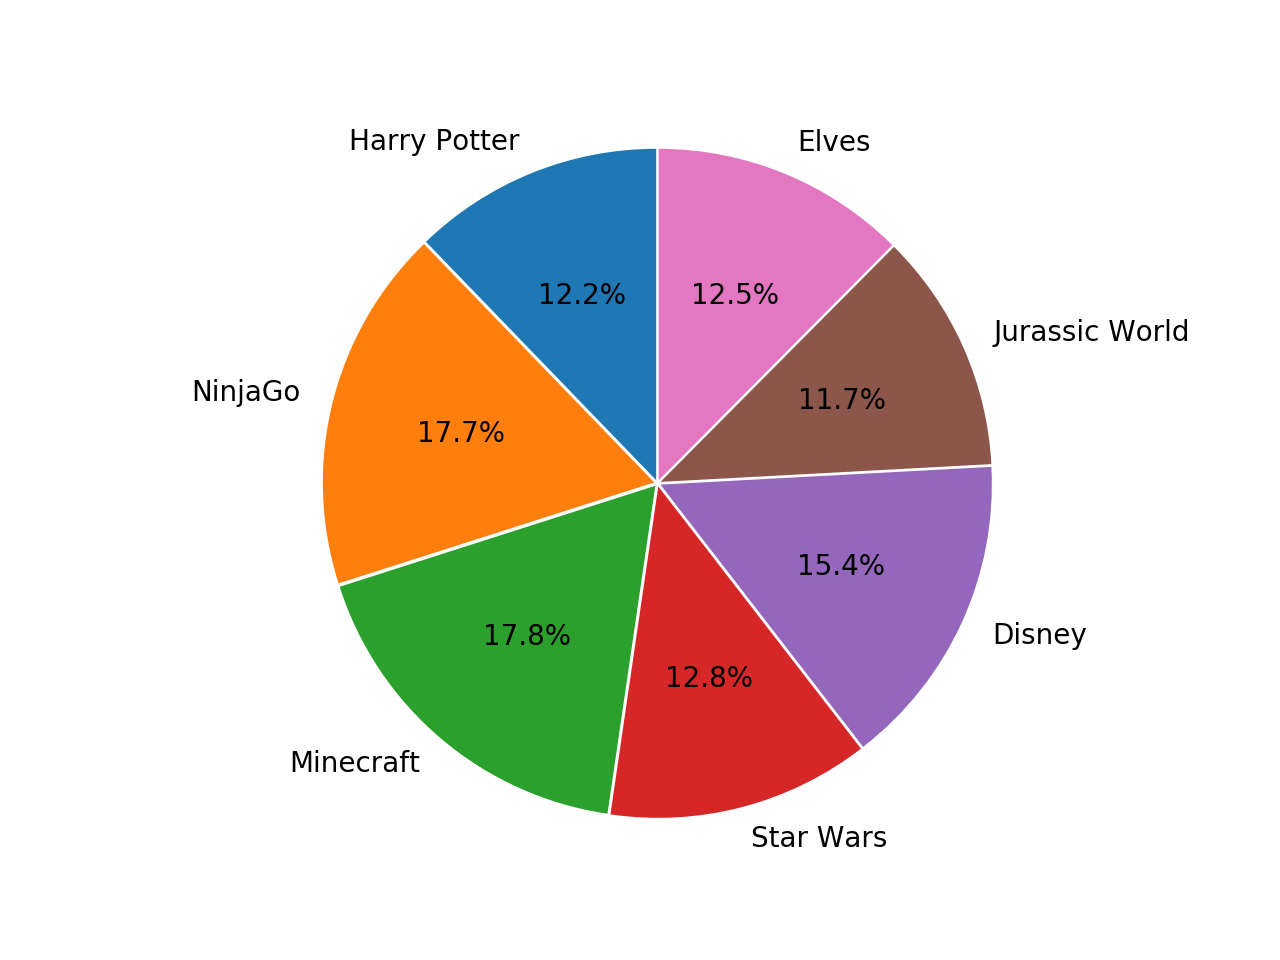

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot?
import random
import requests as rq
import numpy as np
from watson_developer_cloud import PersonalityInsightsV3
from __future__ import print_function
import json
from os.path import join, dirname


def cultOfPersonality(text):
    personality_insights = PersonalityInsightsV3(version='...',
                                             username='...',
                                             password='...', 
                                             url='https://gateway-fra.watsonplatform.net/personality-insights/api')
    profile = personality_insights.profile(
        text,
        content_type='text/plain',
        consumption_preferences=False)
    
    return profile

def cultOfWikipedia(storeOrInput):
    request = {'titles':storeOrInput}
    r = rq.get('https://en.wikipedia.org/w/api.php?format=json&action=query&prop=extracts&exintro&explaintext&redirects=2', params=request).json()
    c_page = list(r['query']['pages'].keys())[0]
    intro = r['query']['pages'][c_page]['extract']
    
    return intro

def produceVector(profile):
    
    vector = []
    for trait in profile['personality']:
        vector.append(trait['percentile'])
    for trait in profile['needs']:
        vector.append(trait['percentile'])  
    for trait in profile['values']:
        vector.append(trait['percentile'])
    
    return vector
    

themes = ['Harry Potter', 'NinjaGo', 'Minecraft', 'Star Wars', 'Disney', 'Jurassic World', 'Elves']

hobby = input('What is your favourite hobby : ')
hobbyDescr = cultOfWikipedia(hobby)
try:
    hobbyProfile = cultOfPersonality(hobbyDescr)
    hobbyVector = produceVector(hobbyProfile)
except:
    hobbyVector = [1]*22

country = input('Where are you from : ')

countryDescr = cultOfWikipedia(country)
try:
    countryProfile = cultOfPersonality(countryDescr)
    countryVector = produceVector(countryProfile)
except:
    countryVector = [1]*22

animal = input('If you were an animal what animal would you be : ')
animalDescr = cultOfWikipedia(animal)
try:
    animalProfile = cultOfPersonality(animalDescr)
    animalVector = produceVector(animalProfile)
except:
    animalVector = [1]*22

our_dict = {}

for theme in themes:
    
    intro = cultOfWikipedia(theme)
    profile = cultOfPersonality(intro)
    vector = produceVector(profile)
        
    our_dict[theme] = np.inner(np.asarray(vector)/np.linalg.norm(np.asarray(vector)), np.asarray(hobbyVector)/np.linalg.norm(np.asarray(hobbyVector))) + \
                      np.inner(np.asarray(vector)/np.linalg.norm(np.asarray(vector)), np.asarray(countryVector)/np.linalg.norm(np.asarray(countryVector))) + \
                      np.inner(np.asarray(vector)/np.linalg.norm(np.asarray(vector)), np.asarray(animalVector)/np.linalg.norm(np.asarray(animalVector)))
x = list(our_dict.values())
y = np.exp(x - np.max(x)) / np.sum(np.exp(x - np.max(x)))

for i, theme in enumerate(themes):
    our_dict[theme] = y[i]


labels = list(our_dict.keys())
scores = list(our_dict.values())
explode = (0.01,)*7

fig1, ax1 = plt.subplots()
ax1.pie(scores, explode=explode, labels=labels, autopct='%1.1f%%',
        startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()